In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [22]:
# extra for fun
import yfinance as yf
from datetime import datetime 

In [23]:
NUM_OF_SIMULATIONS = 1000

In [ ]:
def stock_monte_carlo(S0, mu, sigma, N=252):
    results = []

    for _ in range(NUM_OF_SIMULATIONS): 
        prices = [S0]
        for _ in range(N): 

            # S(t) = S(0) * e ^ ((mean - 1/2 * variance) * t + STD * W(t)); note, t=1 as we increment by a day each time
            stock_price = prices[-1] * np.exp((mu - 0.5 * sigma**2) + sigma * np.random.normal())
            prices.append(stock_price)
        
        results.append(prices)
    
    simulated_data = pd.DataFrame(results)

    simulated_data = simulated_data.T

    simulated_data['mean'] = simulated_data.mean(axis=1)

    # plot the mean stock price for each simulation
    plt.plot(simulated_data['mean'])
    plt.show()

    print('Prediction for future stock price: $%.2f' % simulated_data['mean'].tail(1))

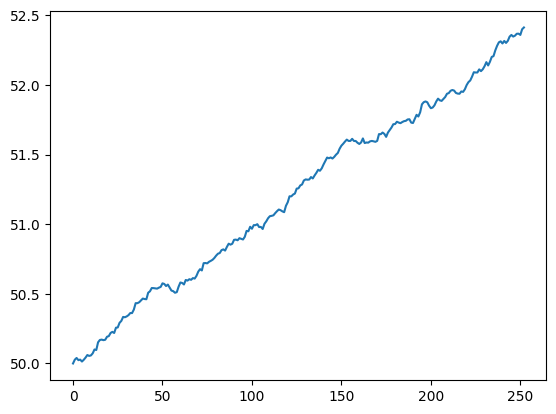

Prediction for future stock price: 52.41


/var/folders/zy/64gtqsbx4ts83dlyf7nwkjg00000gn/T/ipykernel_41577/484593668.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Prediction for future stock price: %.2f' % simulated_data['mean'].tail(1))


In [25]:
stock_monte_carlo(50, 0.0002, 0.01)